In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("data/corner_2019.csv")
df = df.dropna().drop("Unnamed: 0", axis=1)
df.index = pd.to_datetime(df.date)
df = df.drop("date", axis=1)
df.head()

,name,text
date,,
2019-12-20 18:03:34+00:00,Niklas,Geilo
2019-12-20 18:02:14+00:00,John,Ai!
2019-12-20 17:59:35+00:00,Felix,😳
2019-12-20 17:52:53+00:00,Artem,Warten auf Gandalf
2019-12-20 17:51:07+00:00,Frederik,Sinnlos in mittelerde


In [3]:
df.name.unique()

array(['Niklas', 'John', 'Felix', 'Artem', 'Frederik', 'Tillmann',
       'Dominik', 'Joshua', 'Sven', 'Maurits', 'Valentin'], dtype=object)

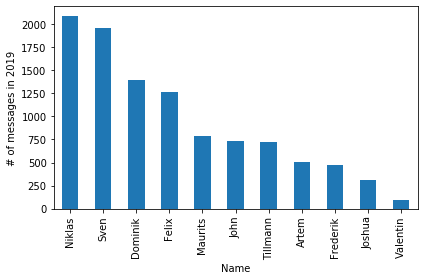

In [4]:
n_msg = df.groupby("name").count().sort_values(by="text", ascending=False)["text"]

ax = n_msg.plot(kind="bar")
ax.set_xlabel("Name")
ax.set_ylabel("# of messages in 2019")
plt.tight_layout()
plt.savefig("results/n_msg.png")

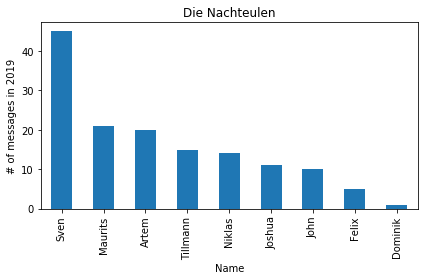

In [5]:
n_night = df.between_time("00:00", "05:00").groupby("name").count().sort_values(by="text", ascending=False)["text"]
ax = n_night.plot(kind="bar")
ax.set_xlabel("Name")
ax.set_ylabel("# of messages in 2019")
ax.set_title("Die Nachteulen")
plt.tight_layout()
plt.savefig("results/n_night.png")

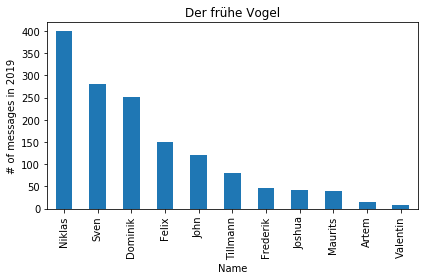

In [6]:
n_early = df.between_time("06:00", "09:00").groupby("name").count().sort_values(by="text", ascending=False)["text"]
ax = n_early.plot(kind="bar")
ax.set_xlabel("Name")
ax.set_ylabel("# of messages in 2019")
ax.set_title("Der frühe Vogel")
plt.tight_layout()
plt.savefig("results/n_early.png")

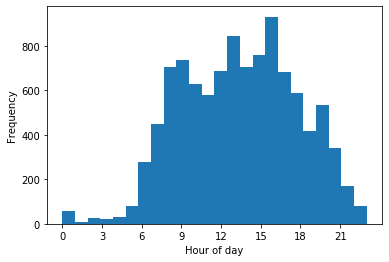

In [7]:
f, ax = plt.subplots()
ax.hist(df.index.hour, bins=24)
ax.set_xticks([0, 3, 6, 9, 12, 15, 18, 21])
ax.set_ylabel("Frequency")
ax.set_xlabel("Hour of day")
f.savefig("results/daytime_distribution.png")

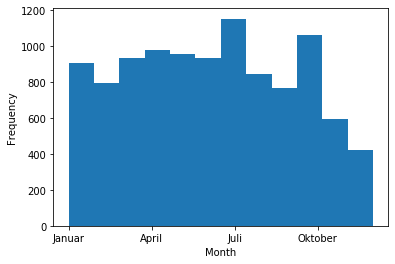

In [8]:
f, ax = plt.subplots()
ax.hist(df.index.month, bins=12)
ax.set_xticks([1, 4, 7, 10])
ax.set_xticklabels(["Januar", "April", "Juli", "Oktober"])
ax.set_ylabel("Frequency")
ax.set_xlabel("Month")
f.savefig("results/month_distribution.png")

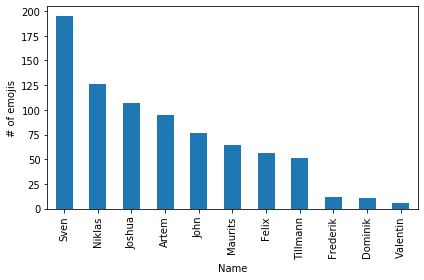

In [9]:
from emoji import UNICODE_EMOJI

def is_emoji(s):
    return s in UNICODE_EMOJI

def contains_emoji(s):
    return any(emj in s for emj in UNICODE_EMOJI)

df["emoji"] = df.text.apply(contains_emoji)

num_emoji = df.groupby("name").sum()["emoji"]
num_emoji.sort_values(ascending=False).plot(kind="bar")
plt.ylabel("# of emojis")
plt.xlabel("Name")
plt.tight_layout()
plt.savefig("results/emojis.png")

In [11]:
print(df.text.apply(lambda x: "adorno" in x.lower()).sum())

print(df.text.apply(lambda x: "luhmann" in x.lower()).sum())

print(df.text.apply(lambda x: "marx" in x.lower()).sum())

2
7
6


In [14]:
print(df.text.apply(lambda x: "sex" in x.lower()).sum())

print(df.text.apply(lambda x: "drogen" in x.lower() or "drugs" in x.lower()).sum())

print(df.text.apply(lambda x: "rock" in x.lower()).sum())

30
4
15


In [19]:
df[df.text.apply(lambda x: x.lower() == "thats what she said")]

,name,text,emoji
date,,,
2019-02-04 21:20:59+00:00,Sven,Thats what she said,False
